# 🔵 **Parte 7: Regressão Logística** 🔵

Apesar do nome, é um algoritmo de classificação.

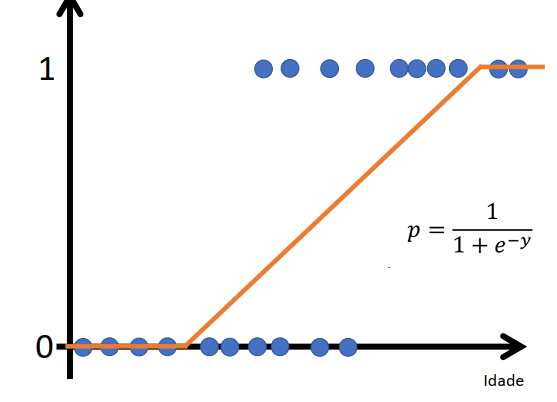

🔹 **Como funciona a regressão logística?**
* Gera uma regressão linear ( y = ax + b)
* Aplica y na função sigmoide (p = 1 / (1 + e^-y))
* O modelo criará várias estimações de a e b, até que a função sigmoide se encaixe bem nos dados.

   Ele vai usar os parâmetros que geram o menor erro possível, o mínimo global.

🔹 **Como funciona? Parte 2**
Uma vez que o modelo tenha calculado p, na função sigmoide, como se dá a classificação?

Você pode definir um valor acima do qual a variável de interesse será 1 (sim) ou 0 (não).

Exemplo para default. Se p retornado é 0.8, classificar que o cliente irá devolver o empréstimo.

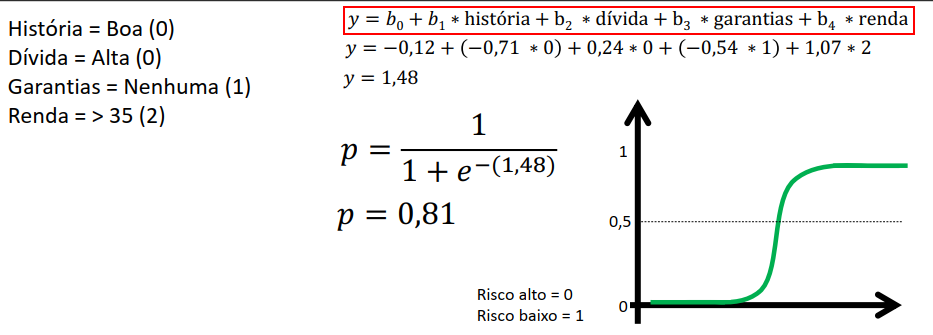

# 🔴 Regressão logística

In [3]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression

## ⭕ Base risco de crédito
Base utilizada para teste

### Importando e tratando dados

In [4]:
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, Y_risco_credito = pickle.load(f)

In [5]:
X_risco_credito #variáveis explicativas

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [6]:
Y_risco_credito # variável resposta

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
# Para simplificação, vamos excluir os registros cujas respostas são risco "moderado". Itens 2, 7 e 11
X_risco_credito_ajustado = np.delete(X_risco_credito, [2,7,11], axis = 0)
X_risco_credito_ajustado.shape

(11, 4)

In [11]:
Y_risco_credito_ajustado = np.delete(Y_risco_credito, [2,7,11], axis = 0)
Y_risco_credito_ajustado

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

### Criando modelo

In [14]:
logistic_risco_credito = LogisticRegression(random_state = 1, max_iter= 20)
#Max_iter define nº máximo de testes para encontarr os coeficientes ótimos.

logistic_risco_credito.fit(X_risco_credito_ajustado, Y_risco_credito_ajustado)

LogisticRegression(max_iter=20, random_state=1)

In [15]:
# Valor do intercepto da regressão linear
logistic_risco_credito.intercept_

array([-0.80828993])

In [16]:
# Coeficientes da regressão linear
logistic_risco_credito.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

### Gerando previsões

In [19]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

## ⭕ Base credit data - 94.60%

### Importando dados

In [20]:
with open('credit.pkl', 'rb') as f:
  X_credit_treino, X_credit_teste, Y_credit_treino, Y_credit_teste = pickle.load(f)

In [21]:
# Dados de treino
X_credit_treino.shape, Y_credit_treino.shape

((1500, 3), (1500,))

In [22]:
# Dados de teste
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

### Criando modelo

In [24]:
logistic_credit = LogisticRegression(random_state = 1)
logistic_credit.fit(X_credit_treino, Y_credit_treino)

LogisticRegression(random_state=1)

In [25]:
# Intercepto da regressão linear que fundamenta o modelo de Reg. Logística
logistic_credit.intercept_

array([-6.02975455])

In [26]:
# Coeficientes da regressão linear que fundamenta o modelo de Reg. Logística

logistic_credit.coef_

array([[-2.5492665 , -3.72279323,  3.93940035]])

### Previsões e Análise do modelo

In [28]:
previsoes2 = logistic_credit.predict(X_credit_teste)

In [30]:
# Verificando acurária do modelo
accuracy_score(previsoes2, Y_credit_teste)

0.946

0.946

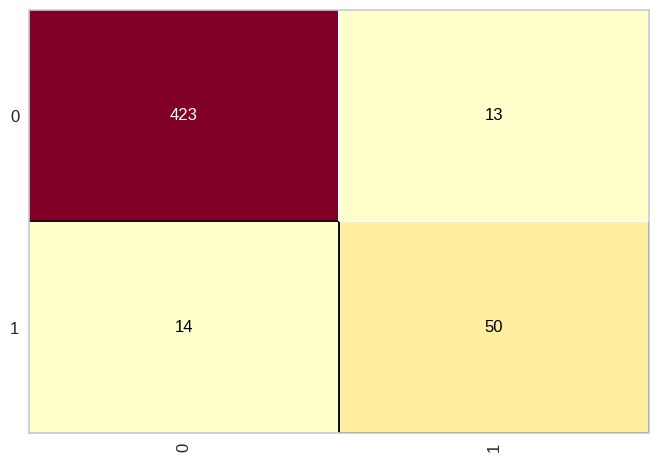

In [31]:
# Gerando matriz de confusão
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treino, Y_credit_treino)
cm.score(X_credit_teste, Y_credit_teste)

In [32]:
print(classification_report(Y_credit_teste, previsoes2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## ⭕ Base census - 84.95%

### Importando dados

In [33]:
with open('census.pkl', 'rb') as f:
  X_census_treino,  X_census_teste, Y_census_treino, Y_census_teste = pickle.load(f)

In [34]:
# Dados de treino
X_census_treino.shape, Y_census_treino.shape

((27676, 108), (27676,))

In [36]:
# Dados de teste
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

### Gerando modelo e previsões

In [37]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(X_census_treino, Y_census_treino)

LogisticRegression(random_state=1)

In [38]:
previsoes3 = logistic_census.predict(X_census_teste)
previsoes3

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Avaliando o modelo

In [39]:
accuracy_score(Y_census_teste, previsoes3)

0.849539406345957

0.849539406345957

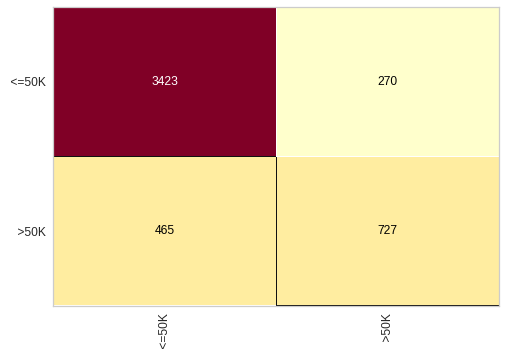

In [ ]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treino, Y_census_treino)
cm.score(X_census_teste, Y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

